<a href="https://colab.research.google.com/github/kumbieny/kumbieny/blob/main/CNN_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#install tensorflow
!pip install -q tensorflow-gpu==2.9.1
import tensorflow as tf
print(tf.__version__)

2.9.0


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [22]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [23]:
# data is only 2D
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [24]:
#number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [25]:
# building the CNN model using function API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)

In [26]:
#compile and fit
#Nb: Make sure you are using the GPU for this
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 46s 24ms/step - loss: 0.5201 - accuracy: 0.8087 - val_loss: 0.3992 - val_accuracy: 0.8505
Epoch 2/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3624 - accuracy: 0.8639 - val_loss: 0.3608 - val_accuracy: 0.8683
Epoch 3/15
1875/1875 [==============================] - 40s 22ms/step - loss: 0.3149 - accuracy: 0.8813 - val_loss: 0.3270 - val_accuracy: 0.8819
Epoch 4/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2794 - accuracy: 0.8954 - val_loss: 0.3103 - val_accuracy: 0.8879
Epoch 5/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2535 - accuracy: 0.9044 - val_loss: 0.3048 - val_accuracy: 0.8912
Epoch 6/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2340 - accuracy: 0.9110 - val_loss: 0.2992 - val_accuracy: 0.8913
Epoch 7/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2128 - accuracy: 0.9190 - val_loss: 0.3028 -

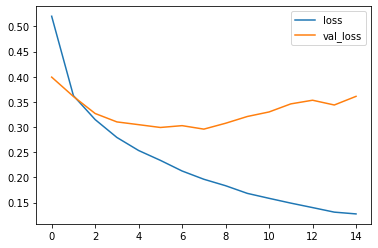

In [28]:
#plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

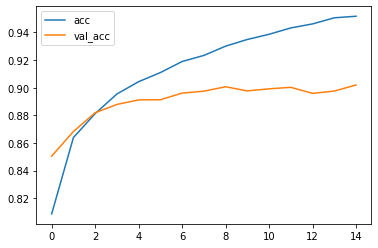

In [29]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 2s 7ms/step
Confusion matrix, without normalization
[[862   0  21  21   1   2  88   0   5   0]
 [  4 974   1  16   2   0   3   0   0   0]
 [ 20   0 862   9  46   1  61   0   1   0]
 [ 15   2  14 935  12   0  22   0   0   0]
 [  3   1  58  42 824   0  72   0   0   0]
 [  1   0   1   0   0 974   0  13   1  10]
 [109   1  68  24  88   0 702   0   8   0]
 [  0   0   0   0   0  12   0 953   0  35]
 [  2   0   6   4   3   2   6   1 975   1]
 [  1   0   0   0   0  10   0  29   1 959]]


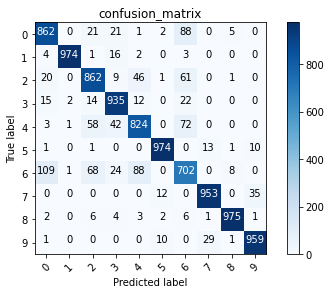

In [33]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='confusion_matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt= '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment = "center",
               color="white" if cm[i, j]> thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [35]:
#label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

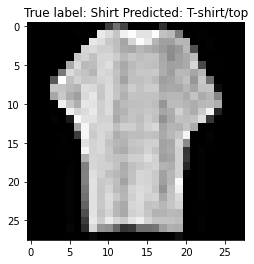

In [36]:
#show some misclassified examples
misclassified_idx = np.where(p_test !=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));